In [1]:
import numpy
import matplotlib.pyplot as plt 
import pandas
import mglearn
import os
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans
import sklearn.feature_selection

import graphviz
import mpl_toolkits.mplot3d as plt3dd

## General approach to machine learning:

In [6]:
# Get data
X, y = sklearn.datasets.make_blobs(random_state=0);

# Split the data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0);

# Fit model 
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train);

# Evaluate generalisation of model
print("Test score: {:4.2f} %".format(logreg.score(X_test, y_test)*100))

Test score: 88.00 %


## Cross Validation

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In crossvalidation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.

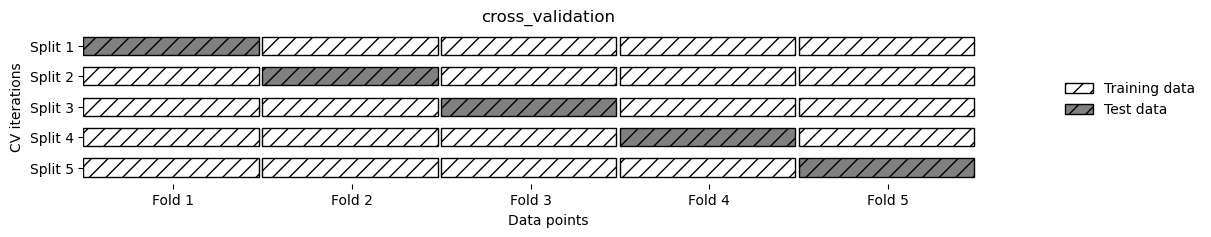

In [7]:
mglearn.plots.plot_cross_validation();

In [41]:
iris = sklearn.datasets.load_iris();
logreg = sklearn.linear_model.LogisticRegression(max_iter=1500);

scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=5);
for i in range(0, len(scores)):
    print("Cross-validation score {}: {:4.2f} %".format(i+1, scores[i]*100));


print("\nAverage cross-validation score: {:4.2f} %".format(scores.mean()*100))

Cross-validation score 1: 96.67 %
Cross-validation score 2: 100.00 %
Cross-validation score 3: 93.33 %
Cross-validation score 4: 96.67 %
Cross-validation score 5: 100.00 %

Average cross-validation score: 97.33 %


Appears tha stratifold cross validation is already built in base cross validation for clasification

## Benefit of cross validation

when using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset.

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. When using train_test_split, we usually use 75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models.


The main disadvantage of cross-validation is $\textcolor{red}{increased}$ computational cost.

It is important to keep in mind that cross-validation is not a way to build a model that can be applied to new data. Cross-validation does not return a model. When calling cross_val_score, multiple models are built internally, but the purpose of cross-validation is only to evaluate how well a given algorithm will generalize when trained on a specific dataset.

## Startified k-Fold cross-validation and other strategies

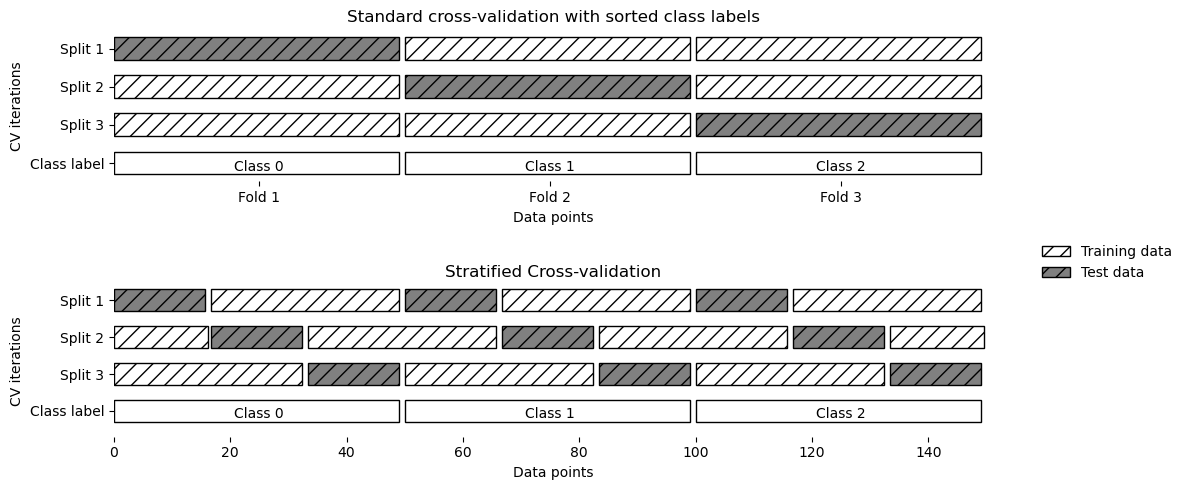

In [17]:
mglearn.plots.plot_stratified_cross_validation()

In [48]:
# default cross validation ensure equal distribution of classes in folds 
# with base kfold=3, model only learns to classify one type of class
# per set, resulting in a score of 0.
kfold = sklearn.model_selection.KFold(n_splits=3);
print("Cross-validation scores:\n{}".format(sklearn.model_selection.cross_val_score(
                                            logreg, iris.data, iris.target,         
                                            cv=kfold
)*100));

Cross-validation scores:
[0. 0. 0.]


Another way to resolve this problem is to shuffle the data instead of stratifying the folds, to remove the ordering of the samples by label

In [50]:
kfold = sklearn.model_selection.KFold(n_splits=3, shuffle=True, random_state=0);
print("Cross-validation scores:\n{}".format(sklearn.model_selection.cross_val_score(
                                            logreg, iris.data, iris.target,         
                                            cv=kfold
)*100));

Cross-validation scores:
[98. 96. 96.]


## Leave-one-out-cross-validation

Another frequently used cross-validation method is leave-one-out. You can think of leave-one-out cross-validation as k-fold cross-validation where each fold is a single sample. For each split, you pick a single data point to be the test set. This can be very time consuming, particularly for large datasets, but sometimes provides better estimates on small datasets:

In [54]:
loo = sklearn.model_selection.LeaveOneOut();
scores = sklearn.model_selection.cross_val_score(logreg, iris.data, iris.target, cv=loo);

print("Number of cv iterations: ", len(scores));
print("Mean accuracy: {:4.2f} %".format(scores.mean()*100));

Number of cv iterations:  150
Mean accuracy: 96.67 %


## Shuffle-split cross-validation